# Data Cleaning, Understanding, and Exploratory Data Analysis

**Project:** Chili Price Forecasting - Medan Markets

**Purpose:** Load, clean, and explore the chili price dataset

**Outputs:**
- Cleaned data saved to `data/processed/`
- Imputed data saved to `data/imputed/`
- Data with holiday features saved to `data/processed/`
- EDA visualizations saved to `results/plots/`


## Section 1: Project Setup and Data Loading

In [33]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
from pathlib import Path
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# Create organized folder structure
def create_folder_structure():
    """Create organized folder structure for data and models"""
    # Go up one directory from notebooks/ to project root
    base_path = Path('..')
    
    folders = [
        'data',
        'data/raw',
        'data/processed',
        'data/imputed',
        'data/normalized',
        'data/scalers',
        'models',
        'models/arima',
        'models/lstm',
        'models/prophet',
        'results',
        'results/plots',
        'results/metrics'
    ]

    for folder in folders:
        folder_path = base_path / folder
        folder_path.mkdir(parents=True, exist_ok=True)
        print(f"Created/Verified folder: {folder}")

# Create folder structure
create_folder_structure()

Created/Verified folder: data
Created/Verified folder: data/raw
Created/Verified folder: data/processed
Created/Verified folder: data/imputed
Created/Verified folder: data/normalized
Created/Verified folder: data/scalers
Created/Verified folder: models
Created/Verified folder: models/arima
Created/Verified folder: models/lstm
Created/Verified folder: models/prophet
Created/Verified folder: results
Created/Verified folder: results/plots
Created/Verified folder: results/metrics


In [34]:
# Load the dataset (use ../ to go up from notebooks/ folder)
df_raw = pd.read_csv('../data/raw/raw-data.csv', delimiter=';')

# Save raw data
df_raw.to_csv('../data/raw/original_dataset.csv', index=False)
print("Raw dataset saved to: data/raw/original_dataset.csv")

# Display basic information about the dataset
print("Dataset Shape:", df_raw.shape)
print("\nColumn Names:")
print(df_raw.columns.tolist())
print("\nFirst few rows:")
df_raw.head()

Raw dataset saved to: data/raw/original_dataset.csv
Dataset Shape: (8, 477)

Column Names:
['No', 'Komoditas (Rp)', '01/ 01/ 2024', '02/ 01/ 2024', '03/ 01/ 2024', '04/ 01/ 2024', '05/ 01/ 2024', '08/ 01/ 2024', '09/ 01/ 2024', '10/ 01/ 2024', '11/ 01/ 2024', '12/ 01/ 2024', '15/ 01/ 2024', '16/ 01/ 2024', '17/ 01/ 2024', '18/ 01/ 2024', '19/ 01/ 2024', '22/ 01/ 2024', '23/ 01/ 2024', '24/ 01/ 2024', '25/ 01/ 2024', '26/ 01/ 2024', '29/ 01/ 2024', '30/ 01/ 2024', '31/ 01/ 2024', '01/ 02/ 2024', '02/ 02/ 2024', '05/ 02/ 2024', '06/ 02/ 2024', '07/ 02/ 2024', '08/ 02/ 2024', '09/ 02/ 2024', '12/ 02/ 2024', '13/ 02/ 2024', '14/ 02/ 2024', '15/ 02/ 2024', '16/ 02/ 2024', '19/ 02/ 2024', '20/ 02/ 2024', '21/ 02/ 2024', '22/ 02/ 2024', '23/ 02/ 2024', '26/ 02/ 2024', '27/ 02/ 2024', '28/ 02/ 2024', '29/ 02/ 2024', '01/ 03/ 2024', '04/ 03/ 2024', '05/ 03/ 2024', '06/ 03/ 2024', '07/ 03/ 2024', '08/ 03/ 2024', '11/ 03/ 2024', '12/ 03/ 2024', '13/ 03/ 2024', '14/ 03/ 2024', '15/ 03/ 2024', '18/

,No,Komoditas (Rp),01/ 01/ 2024,02/ 01/ 2024,03/ 01/ 2024,04/ 01/ 2024,05/ 01/ 2024,08/ 01/ 2024,09/ 01/ 2024,10/ 01/ 2024,...,13/ 10/ 2025,14/ 10/ 2025,15/ 10/ 2025,16/ 10/ 2025,17/ 10/ 2025,20/ 10/ 2025,21/ 10/ 2025,22/ 10/ 2025,23/ 10/ 2025,24/ 10/ 2025
0,I,Semua Provinsi,"59,950","66,250","63,850","62,600","60,950","57,850","57,250","56,650",...,"58,450","57,850","57,000","56,300","57,000","55,650","55,800","54,650","53,900","52,900"
1,II,Sumatera Utara,"46,400","51,100","52,350","50,200","46,200","37,650","37,350","37,500",...,"80,450","80,550","79,150","76,800","75,250","83,000","80,050","77,550","74,600","73,000"
2,1,Kota Medan,"28,800","34,100","34,100","31,600","28,900","28,900","27,500","26,500",...,"79,400","79,400","75,100","71,300","69,600","93,300","80,000","75,100","71,100","72,000"
3,a,Pasar Sukaramai,"30,000","38,000","38,000","38,000","30,000","30,000","29,000","29,000",...,"82,000","82,000","74,000","70,000","70,000","94,000","79,000","74,000","70,000","72,000"
4,b,Pasar Aksara,"30,000","35,000","35,000","30,000","30,000","30,000","30,000","25,000",...,"80,000","80,000","75,000","70,000","70,000","91,000","80,000","73,500","71,000","71,000"


## Section 2: Data Cleaning and Preprocessing

In [35]:
# Remove unnecessary columns and rename
df_clean = df_raw.drop(columns=['No'])
df_clean = df_clean.rename(columns={'Komoditas (Rp)': 'Market'})

# Melt the dataframe to long format
df_long = df_clean.melt(id_vars=['Market'], var_name='Date_Str', value_name='Price_Str')

# Save processed data
df_long.to_csv('../data/processed/melted_data.csv', index=False)
print("Melted data saved to: data/processed/melted_data.csv")

print("Data after melting:")
print(f"Shape: {df_long.shape}")
df_long.head(10)

Melted data saved to: data/processed/melted_data.csv
Data after melting:
Shape: (3800, 3)


,Market,Date_Str,Price_Str
0,Semua Provinsi,01/ 01/ 2024,"59,950"
1,Sumatera Utara,01/ 01/ 2024,"46,400"
2,Kota Medan,01/ 01/ 2024,"28,800"
3,Pasar Sukaramai,01/ 01/ 2024,"30,000"
4,Pasar Aksara,01/ 01/ 2024,"30,000"
5,Pasar Petisah,01/ 01/ 2024,"30,000"
6,Pusat Pasar,01/ 01/ 2024,"27,500"
7,Pasar Brayan,01/ 01/ 2024,"26,500"
8,Semua Provinsi,02/ 01/ 2024,"66,250"
9,Sumatera Utara,02/ 01/ 2024,"51,100"


In [36]:
# Convert price strings to numeric values
df_long['Price'] = df_long['Price_Str'].str.replace(',', '').replace('-', np.nan)
df_long['Price'] = pd.to_numeric(df_long['Price'], errors='coerce')

# Convert date strings to datetime
df_long['Date'] = pd.to_datetime(df_long['Date_Str'], format='%d/ %m/ %Y', errors='coerce')

# Filter out summary/aggregate rows
exclude_markets = ['Semua Provinsi', 'Sumatera Utara', 'Kota Medan']
df_filtered = df_long[~df_long['Market'].isin(exclude_markets)].copy()

# Remove rows with invalid dates or prices
df_filtered = df_filtered.dropna(subset=['Date', 'Price'])

# Save cleaned data
df_filtered.to_csv('../data/processed/cleaned_data.csv', index=False)
print("Cleaned data saved to: data/processed/cleaned_data.csv")

print("Data after cleaning:")
print(f"Shape: {df_filtered.shape}")
print(f"Date range: {df_filtered['Date'].min()} to {df_filtered['Date'].max()}")
print(f"Markets: {df_filtered['Market'].unique()}")

Cleaned data saved to: data/processed/cleaned_data.csv
Data after cleaning:
Shape: (2355, 5)
Date range: 2024-01-01 00:00:00 to 2025-10-24 00:00:00
Markets: ['Pasar Sukaramai' 'Pasar Aksara' 'Pasar Petisah' 'Pusat Pasar'
 'Pasar Brayan']


In [37]:
# Pivot to get markets as columns
df_pivot = df_filtered.pivot(index='Date', columns='Market', values='Price')

# Sort by date
df_pivot = df_pivot.sort_index()

# Handle missing values using interpolation
df_imputed = df_pivot.interpolate(method='linear', axis=0)
df_imputed = df_imputed.fillna(method='ffill').fillna(method='bfill')

# Verify no missing values remain
print("Missing values per market:")
print(df_imputed.isnull().sum())

# Save imputed data
df_imputed.to_csv('../data/imputed/imputed_prices_by_market.csv')
print("Imputed data saved to: data/imputed/imputed_prices_by_market.csv")

# Display basic statistics
print("\nBasic statistics:")
df_imputed.describe()

Missing values per market:
Market
Pasar Aksara       0
Pasar Brayan       0
Pasar Petisah      0
Pasar Sukaramai    0
Pusat Pasar        0
dtype: int64
Imputed data saved to: data/imputed/imputed_prices_by_market.csv

Basic statistics:


Market,Pasar Aksara,Pasar Brayan,Pasar Petisah,Pasar Sukaramai,Pusat Pasar
count,471.000000,471.000000,471.000000,471.000000,471.000000
mean,40630.573248,41368.365180,41000.000000,40547.770701,40266.454352
std,15913.276923,16574.836005,16059.563334,16680.009386,16369.880878
min,18000.000000,20000.000000,19000.000000,18000.000000,18000.000000
25%,28000.000000,28000.000000,28000.000000,27000.000000,26000.000000
50%,36000.000000,36000.000000,37000.000000,37000.000000,36500.000000
75%,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
max,91000.000000,94000.000000,92500.000000,94000.000000,95000.000000


## Section 3: Exploratory Data Analysis

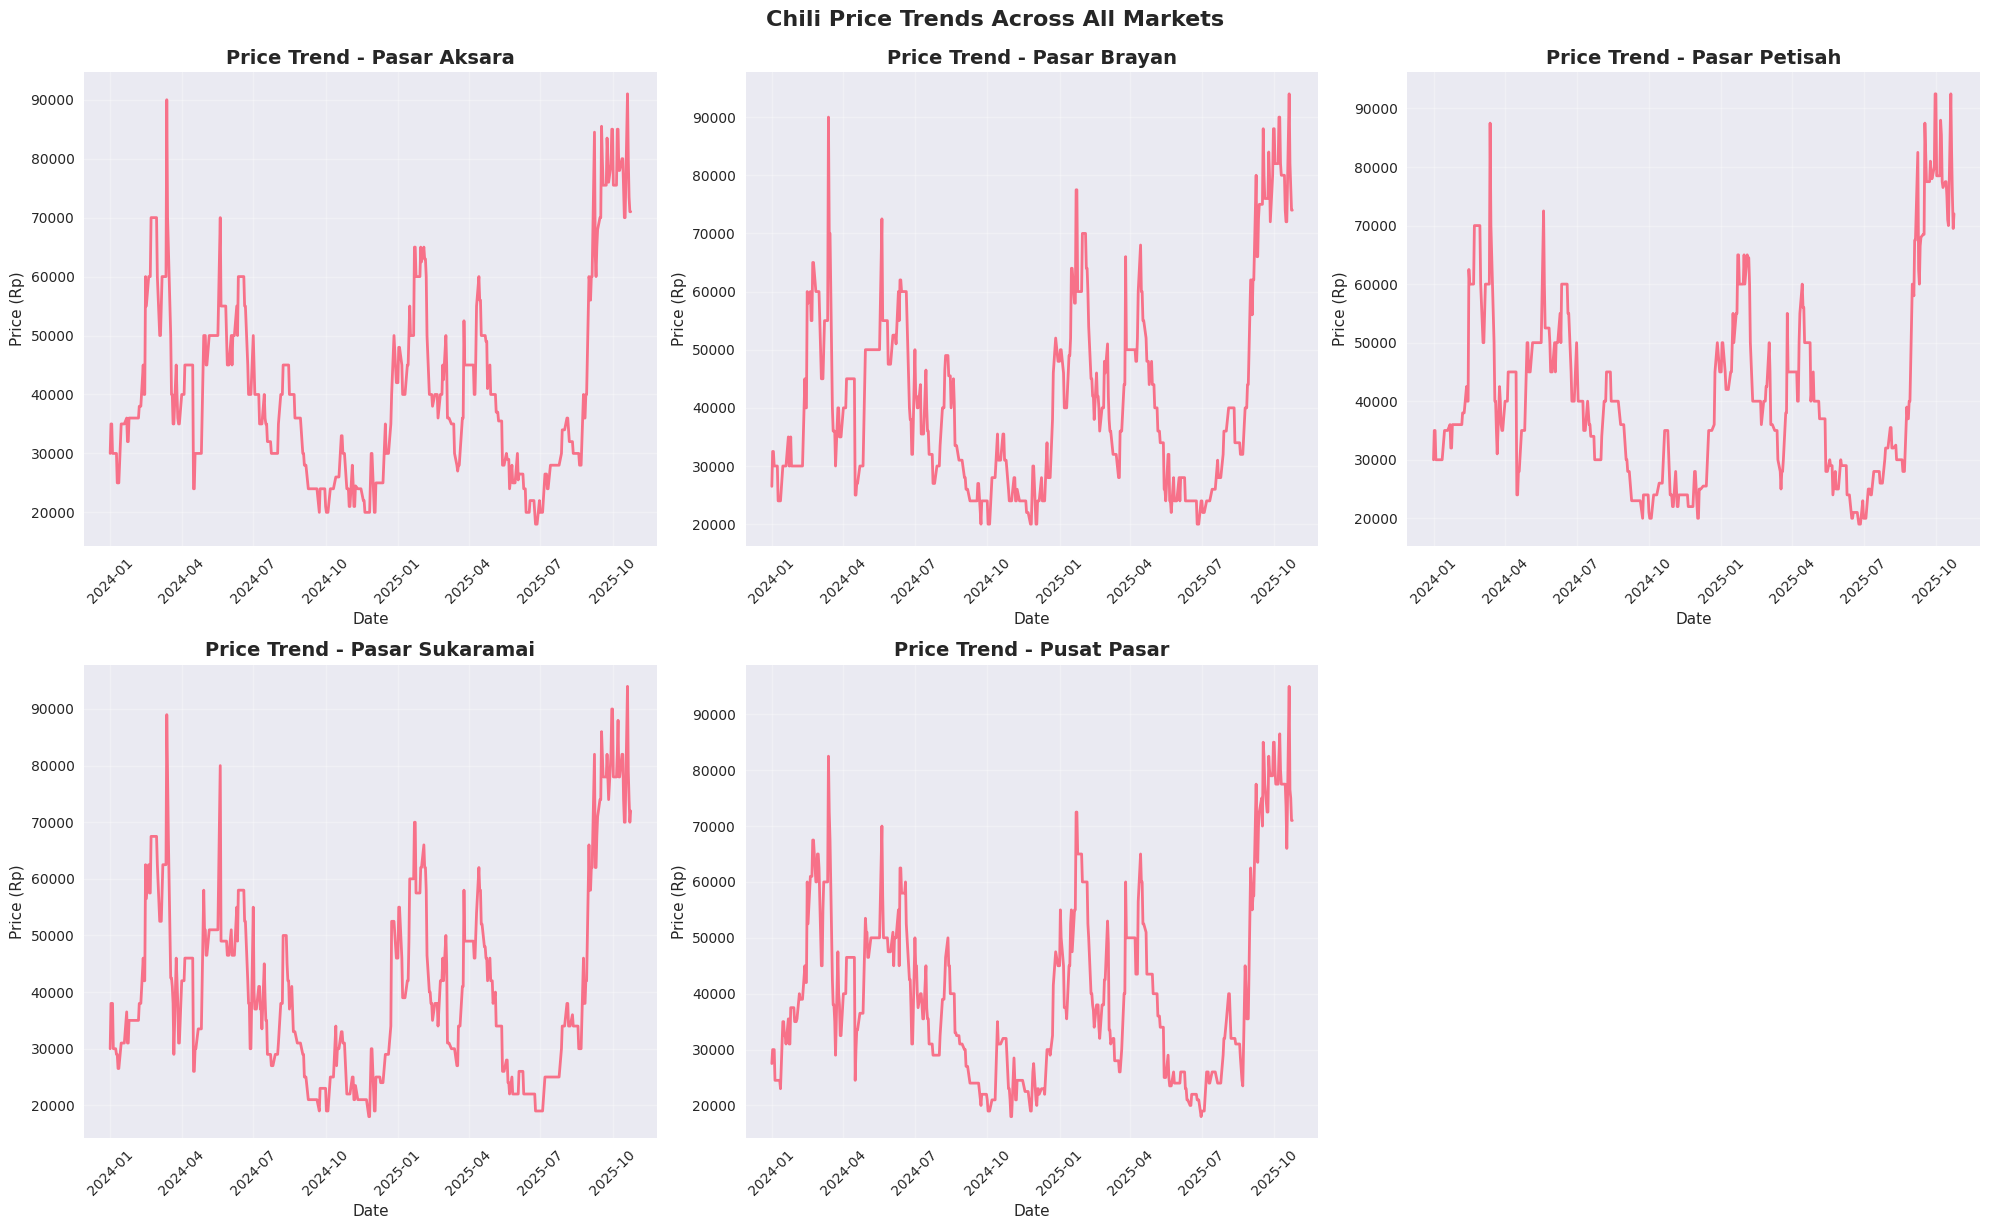

In [38]:
# Plot price trends for all markets
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, market in enumerate(df_imputed.columns):
    axes[i].plot(df_imputed.index, df_imputed[market], linewidth=2)
    axes[i].set_title(f'Price Trend - {market}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (Rp)')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
axes[-1].remove()

plt.tight_layout()
plt.suptitle('Chili Price Trends Across All Markets', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../results/plots/price_trends.png', bbox_inches='tight', dpi=300)
plt.show()

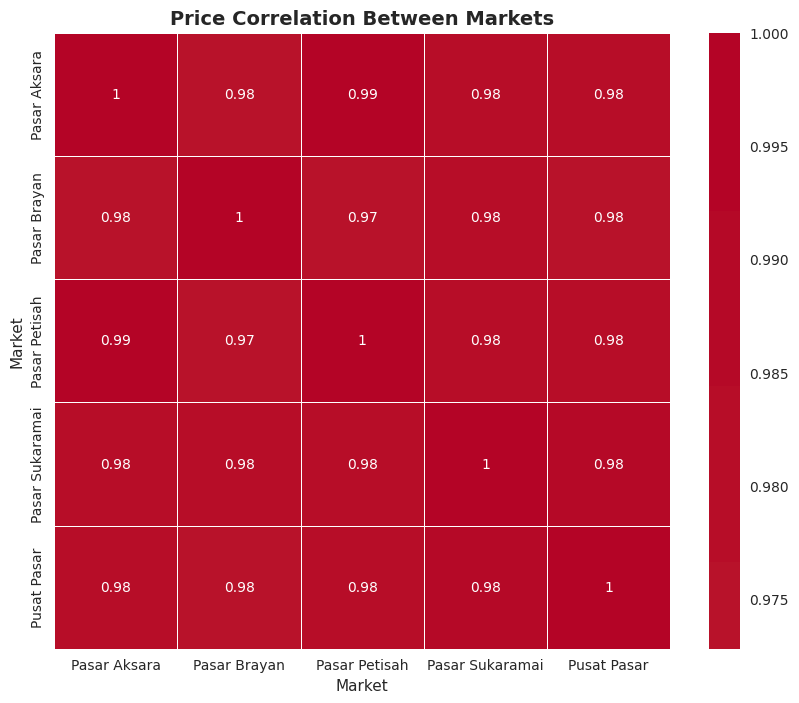


Price Volatility (CV%) by Market:
Pasar Sukaramai: 41.14%
Pusat Pasar: 40.65%
Pasar Brayan: 40.07%
Pasar Petisah: 39.17%
Pasar Aksara: 39.17%


In [39]:
# Correlation analysis
correlation_matrix = df_imputed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Price Correlation Between Markets', fontsize=14, fontweight='bold')
plt.savefig('../results/plots/correlation_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

# Price volatility analysis
volatility = df_imputed.std() / df_imputed.mean() * 100
print("\nPrice Volatility (CV%) by Market:")
for market, vol in volatility.sort_values(ascending=False).items():
    print(f"{market}: {vol:.2f}%")

## Section 4: Feature Engineering

In [40]:
# Define major holidays and their impact periods
holiday_periods = {
    'New Year 2024': ('2023-12-25', '2024-01-01'),
    'New Year 2025': ('2024-12-23', '2025-01-01'),
    'Imlek 2024': ('2024-02-05', '2024-02-12'),
    'Imlek 2025': ('2025-01-27', '2025-02-03'),
    'Ramadhan 2024': ('2024-03-11', '2024-03-18'),
    'Ramadhan 2025': ('2025-02-24', '2025-03-03'),
    'Lebaran 2024': ('2024-04-01', '2024-04-10'),
    'Lebaran 2025': ('2025-03-24', '2025-03-31'),
    'Idul Adha 2024': ('2024-06-10', '2024-06-17'),
    'Idul Adha 2025': ('2025-06-02', '2025-06-09'),
    'Christmas 2024': ('2024-12-16', '2024-12-25')
}

# Create holiday indicator
df_with_holidays = df_imputed.copy()
df_with_holidays['is_holiday'] = 0

for holiday_name, (start_date, end_date) in holiday_periods.items():
    holiday_mask = (df_with_holidays.index >= start_date) & (df_with_holidays.index <= end_date)
    df_with_holidays.loc[holiday_mask, 'is_holiday'] = 1
    print(f"{holiday_name}: {holiday_mask.sum()} days marked")

print(f"\nTotal holiday days: {df_with_holidays['is_holiday'].sum()}")
print(f"Holiday percentage: {df_with_holidays['is_holiday'].mean()*100:.2f}%")

# Save data with holiday features
df_with_holidays.to_csv('../data/imputed/imputed_prices_with_holidays.csv')
print("Data with holidays saved to: data/imputed/imputed_prices_with_holidays.csv")

# Also save to processed folder for ARIMA modeling
df_with_holidays.to_csv('../data/processed/data_with_holidays.csv')
print('✅ Data with holidays also saved to: ../data/processed/data_with_holidays.csv')

New Year 2024: 1 days marked
New Year 2025: 6 days marked
Imlek 2024: 6 days marked
Imlek 2025: 6 days marked
Ramadhan 2024: 6 days marked
Ramadhan 2025: 6 days marked
Lebaran 2024: 8 days marked
Lebaran 2025: 6 days marked
Idul Adha 2024: 6 days marked
Idul Adha 2025: 6 days marked
Christmas 2024: 7 days marked

Total holiday days: 62
Holiday percentage: 13.16%
Data with holidays saved to: data/imputed/imputed_prices_with_holidays.csv
✅ Data with holidays also saved to: ../data/processed/data_with_holidays.csv


## Section 5: Data Preparation for Models

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Define split ratio
TEST_SIZE = 0.2
SPLIT_INDEX = int(len(df_with_holidays) * (1 - TEST_SIZE))

# Split data chronologically
train_data = df_with_holidays.iloc[:SPLIT_INDEX]
test_data = df_with_holidays.iloc[SPLIT_INDEX:]

print(f"Training data: {train_data.shape[0]} days ({train_data.index[0]} to {train_data.index[-1]})")
print(f"Testing data: {test_data.shape[0]} days ({test_data.index[0]} to {test_data.index[-1]})")

# Save datasets
train_data.to_csv('../data/processed/train_data.csv')
test_data.to_csv('../data/processed/test_data.csv')
print("Train/test data saved to: data/processed/")

Training data: 376 days (2024-01-01 00:00:00 to 2025-06-13 00:00:00)
Testing data: 95 days (2025-06-16 00:00:00 to 2025-10-24 00:00:00)
Train/test data saved to: data/processed/


In [42]:
# Markets only (for basic models)
market_columns = ['Pasar Sukaramai', 'Pasar Aksara', 'Pasar Petisah', 'Pusat Pasar', 'Pasar Brayan']

# Scaler for market prices only
scaler_markets = MinMaxScaler()
train_markets_scaled = scaler_markets.fit_transform(train_data[market_columns])
test_markets_scaled = scaler_markets.transform(test_data[market_columns])

# Scaler for markets + holiday feature
feature_columns = market_columns + ['is_holiday']
scaler_with_features = MinMaxScaler()
train_features_scaled = scaler_with_features.fit_transform(train_data[feature_columns])
test_features_scaled = scaler_with_features.transform(test_data[feature_columns])

# Save scalers
joblib.dump(scaler_markets, '../data/scalers/scaler_markets.joblib')
joblib.dump(scaler_with_features, '../data/scalers/scaler_with_features.joblib')

# Save normalized data
pd.DataFrame(train_markets_scaled, columns=market_columns, index=train_data.index).to_csv('../data/normalized/train_markets_normalized.csv')
pd.DataFrame(test_markets_scaled, columns=market_columns, index=test_data.index).to_csv('../data/normalized/test_markets_normalized.csv')
pd.DataFrame(train_features_scaled, columns=feature_columns, index=train_data.index).to_csv('../data/normalized/train_features_normalized.csv')
pd.DataFrame(test_features_scaled, columns=feature_columns, index=test_data.index).to_csv('../data/normalized/test_features_normalized.csv')

print("Scaling completed and all files saved:")
print("- Scalers saved to: data/scalers/")
print("- Normalized data saved to: data/normalized/")

Scaling completed and all files saved:
- Scalers saved to: data/scalers/
- Normalized data saved to: data/normalized/
